## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Resources](#resources)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# import ab_data csv and display first 5 rows
df = pd.read_csv('./ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# checking the length of dataframe with number of entries
df.info()
print ('\nThere are {} rows in this dataframe.'.format(len(df)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB

There are 294478 rows in this dataframe.


c. The number of unique users in the dataset.

In [4]:
# using len() and unique() to count the numbe of of unique rows
len(pd.unique(df['user_id']))

290584

d. The proportion of users converted.

In [5]:
# np.mean() can be used to calculate the proportion of converted users
np.mean(df['converted'] == 1)

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# adding rows where <group> equals 'treatment' and <landing_page> does not equal 'new_page'
treatment_notAligned = ((df['group'] == 'treatment') & (df['landing_page'] != 'new_page'))
treatment_notAligned.sum()

1965

f. Do any of the rows have missing values?

In [7]:
# There are not any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# adding rows where <group> equals 'control' and <landing_page> does not equal 'old_page'
control_notAligned = ((df['group'] == 'control') & (df['landing_page'] != 'old_page'))
control_notAligned.sum()

1928

In [9]:
# Creating new dataset
df2 = df[(treatment_notAligned != True) & (control_notAligned != True)]

# Verify you removed unwanted rows
treatment_notAligned2 = ((df2['group'] == 'treatment') & (df2['landing_page'] != 'new_page'))
control_notAligned2 = ((df2['group'] == 'control') & (df2['landing_page'] != 'old_page'))

# Sum should be zero if unwanted rows were removed correclty
treatment_notAligned2.sum() + control_notAligned2.sum()

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# Use len() and unique() to calculate unique user_ids in df2
len(pd.unique(df2['user_id']))

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# Locating duplicate id
df2['user_id'][df2.duplicated(['user_id'], keep=False)]

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
# Locating row information for duplicate user_id
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [13]:
print('There are {} rows in df2.'.format(len(df2)))

There are 290585 rows in df2.


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# Removing one of the duplicated rows from df2
df2 = df2.drop_duplicates(subset=['user_id'], keep='first')

In [15]:
print('There are {} rows in df2.'.format(len(df2)))

There are 290584 rows in df2.


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
# Calculated probability of converting regardless of page. Multiplied by 100 and rounded value.
calcProb = df2['converted'].sum()/df2['converted'].count()
calcProbClean = (calcProb * 100).round(2)

print('Overall Probability: {}'.format(calcProb))
print('Clean Overall Prob: {}%'.format(calcProbClean))

Overall Probability: 0.11959708724499628
Clean Overall Prob: 11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
# Calculated probability of converting w/in control group. Multiplied by 100 and rounded value.
controlGroup = df2['group'][(df['group'] == 'control')].count()
controlConverted = df2['group'][(df['group'] == 'control') & (df2['converted'] == 1)].count()
calcProb2 = controlConverted/controlGroup
calcProbClean2 = (calcProb2 * 100).round(2)

print('Control Probability: {}'.format(calcProb2))
print('Clean Control Prob: {}%'.format(calcProbClean2))

Control Probability: 0.1203863045004612
Clean Control Prob: 12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
# Calculated probability of converting w/in treatment group. Multiplied by 100 and rounded value.
treatmentGroup = df2['group'][(df['group'] == 'treatment')].count()
treatmentConverted = df2['group'][(df['group'] == 'treatment') & (df2['converted'] == 1)].count()
calcProb3 = treatmentConverted/treatmentGroup
calcProbClean3 = (calcProb3 * 100).round(2)

print('Treatment Probability: {}'.format(calcProb3))
print('Clean Treatment Prob: {}%'.format(calcProbClean3))

Treatment Probability: 0.11880806551510564
Clean Treatment Prob: 11.88%


d. What is the probability that an individual received the new page?

In [19]:
# Calculated probability of receiving the new page. Multiplied by 100 and rounded value.
probNewPage = df2['landing_page'][df2['landing_page'] == 'new_page'].count()/df2['landing_page'].count()
cleanNewPage = (probNewPage * 100 ).round(2)

print('New Page Probability: {}'.format(probNewPage))
print('Clean New Page Prob: {}%'.format(cleanNewPage))

New Page Probability: 0.5000619442226688
Clean New Page Prob: 50.01%


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

The data suggests the control group has a probable conversion rate of roughly 12%, while the treatment group has a probable conversion rate of approximately 11.8%. Since conversion is lower in the treatment group, the data suggest a new page does not lead to increased conversion. Although the control group has a higher conversion rate, more study is needed to determine whether there is a significant difference.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<li/>H<sub>0</sub>: P<sub>new</sub> - P<sub>old</sub> <= 0
<li/>H<sub>a</sub>: P<sub>new</sub> - P<sub>old</sub> > 0

The null hypothesis states the difference between new and old page is less than or equal to zero (suggesting conversion rate will not change based on which page users receive). While the alternative hypothesis states the difference is greater than zero (suggesting there will be an increase in conversion with users receiving the new page).

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
# Conversion rate for new page
# removed this line of code since pNew and pOld should equal overall conversion rate: pNew = df2[df2['landing_page']=='new_page']['converted'].mean()
pNew = pOld = calcProb
pNew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
# Conversion rate for old page
# removed this line of code: pOld = df2[df2['landing_page']=='old_page']['converted'].mean()
pOld

0.11959708724499628

c. What is $n_{new}$?

In [22]:
# Count the number of unique values in column <landing_page>
counts = df2['landing_page'].value_counts()
counts

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

In [23]:
# Return the number of times <new_page> exists in column <landing_page>
nNew = counts['new_page']
nNew

145310

d. What is $n_{old}$?

In [24]:
# Return the number of times <old_page> exists in column <landing_page>
nOld = counts['old_page']
nOld

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# Mean of the two probabilities
pMean = np.mean([pNew,pOld])
pMean

0.11959708724499628

In [26]:
# Subtract pMean from 1
oneMinusP = 1-pMean
oneMinusP

0.8804029127550037

In [27]:
# Simulated conversion rate of Pnew uner the null
new_page_converted = np.random.choice([1,0], size = nNew, p=[pMean,oneMinusP])
new_page_converted.mean()

0.11948248572018444

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted = np.random.choice([1,0], size = nOld, p=[pMean,oneMinusP])
old_page_converted.mean()

0.11939507413577102

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
# Difference of simulated values
new_page_converted.mean() - old_page_converted.mean()

8.741158441341601e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [30]:
# Running the simulation 10,000 times takes roughly 1min 30s to complete
# Each itteration of for loop appends difference of simulated values to list

diffs = []
for _ in range(10000):
#     new_page_converted = np.random.choice([0,1], size = nNew, p=[pMean,oneMinusP])
#     old_page_converted = np.random.choice([0,1], size = nOld, p=[pMean,oneMinusP])
    new_page_converted = np.random.choice([1,0], size = nNew, p=[pNew,oneMinusP])
    old_page_converted = np.random.choice([1,0], size = nOld, p=[pOld,oneMinusP])
    pDiff = new_page_converted.mean() - old_page_converted.mean()
    diffs.append(pDiff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

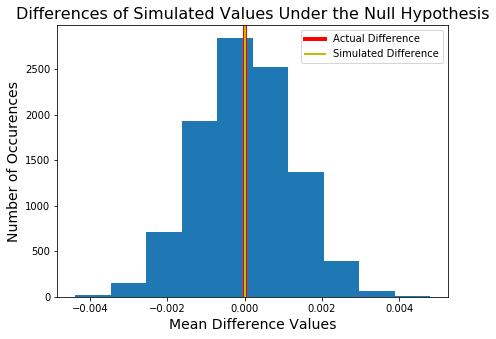

In [31]:
# low, upper = np.percentile(diffs,2.5),np.percentile(diffs, 97.5)
pDifference = pNew - pOld
pDiffs = np.array(diffs)
avgDiffs = np.array(pDiffs).mean()
fig, ax = plt.subplots(figsize=(7, 5))
plt.hist(pDiffs)
plt.axvline(x=pDifference, color='r', linewidth=4, label='Actual Difference')
plt.axvline(x=avgDiffs, color='y', linewidth=2, label='Simulated Difference')
plt.title('Differences of Simulated Values Under the Null Hypothesis', fontsize=16)
plt.xlabel('Mean Difference Values', fontsize=14)
plt.ylabel('Number of Occurences', fontsize=14)
plt.legend()
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
# The proportion of p_diffs that are greater than the actual observed difference.
# This value should be ≈ 0.9
actualDiff = df2[df2['group'] == 'treatment']['converted'].mean() - df2[df2['group'] == 'control']['converted'].mean()
(actualDiff < pDiffs).mean()

0.9054

The proportion of p_diffs that are greater than the actual observed difference (0.9054) corresponds to the p-value listed in section *m*.

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The p-value is used to provide a level of significance at which the null hpyothesis can be rejected. A small p-value (*i.e. <= 0.05*) would provide evidence to reject the null hypothesis in favor of the alternative. A large p-value (*i.e. > 0.05*) would provide evidence to fail to reject the null hypothesis. The p-value (0.5049) is considered high and close to 1. Since the p-value is high, we fail to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
# Number of conversions for each page type
convert_old = len(df2[(df2['landing_page']=='old_page')&(df2['converted']==1)])
convert_new = len(df2[(df2['landing_page']=='new_page')&(df2['converted']==1)])

# values determined earlier
n_old = nOld
n_new = nNew

print('convert_old:', convert_old)
print('convert_new:',convert_new)
print('n_old:', n_old)
print('n_new:', n_new)

convert_old: 17489
convert_new: 17264
n_old: 145274
n_new: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
import statsmodels.api as sm
from scipy.stats import norm

# Calculating p and z scores. Parameters are used for count and nobs
# count are number of successes parameter
# nobs are trial parameters
value = pNew - pOld
z_score, p_value = sm.stats.proportions_ztest(count = [convert_new,convert_old], 
                                              nobs = [n_new,n_old], 
                                              value=value, 
                                              alternative='larger', 
                                              prop_var=False)
print('value:',value)
print('z_score:',z_score)
print('p_value:',p_value)

value: 0.0
z_score: -1.3109241984234394
p_value: 0.9050583127590245


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [35]:
# Critical value at 95% confidence
norm.ppf(1-0.05/2)

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score suggests each standard deviation away from the mean is roughly 1.31 units. Since the z-score (-1.3109241984234394) does not exceed the critical values (±1.959963984540054), we fail to reject the null hypothesis.

The p-value is approximately 0.9, which is larger than 0.05. This also indicates weak evidence against the null hypothesis. Again, we fail to reject the null hypothesis. This corresponds with my answer in part *j* and *k*.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We will use a logistic regression, *sm.Logit()*, which is used to help predict a binary outcome.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
# Add two new columns to dataframe
df2[['ab_page', 'intercept']] = pd.get_dummies(df2['group'])
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
# No missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 7 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
ab_page         290584 non-null uint8
intercept       290584 non-null int64
dtypes: int64(3), object(3), uint8(1)
memory usage: 25.8+ MB


In [38]:
logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

Not sure why this is:
* I used summary() in Udacity's Jupyter Notebook environment. It worked fine.
* But, summary() does not work on my local machine. However, [summary2()](#resource1) does.

In [39]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-04-24 11:16 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0038    0.0081  -247.1457  0.0000  -2.0197  -1.9879
ab_page       0.0150    0.0114     1.3109  0.1899  -0.0074   0.0374
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with ab_page is 0.1899, wich is approximately 0.19. This value can be interchanged using the formula 1-(0.19/2) = 0.905, which corresponds to the p-value I calculated earlier. It suggests I should we should fail to reject the null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

The world is complicated. Many factors can contribute to an observed item of interest (*e.g. The increase in conversion rate of a website*). Since multiple variables can impact conversion rate in this case, it is essential to identify them and measure their impact. 

One disadvantage of too many variables is you could overfit your model. Too many terms can overcomplicate your dataset. Meaning the model is fit to the random noise in your data set rather than truly representing the population. *[source: Five Reasons Why Your R-squared Can Be Too High](#resource3)*.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [40]:
# Import country data
dfCountry = pd.read_csv('countries.csv')
dfCountry.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
# Joining ab test table with countries table
merged = df2.merge(dfCountry, on='user_id')
merged.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,US


In [42]:
# Creating dummy variables for country column
merged[['CA', 'UK', 'US']] = pd.get_dummies(merged['country'])
merged.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,US,0,0,1


In [43]:
# Stats model logit() and fit() countries
logit_country = sm.Logit(merged['converted'],merged[['intercept','UK', 'US']])
result_merged = logit_country.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [44]:
# Summary of results
result_merged.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-04-24 11:16 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

The p-values for both UK and US are greater than 0.05. This data suggests we should fail to reject the null hypothesis.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [45]:
logit_pageCountry = sm.Logit(merged['converted'],merged[['ab_page', 'intercept', 'UK', 'US']])
result_pageCountry = logit_pageCountry.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [46]:
result_pageCountry.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-04-24 11:16 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page        0.0149    0.0114    1.3069  0.1912  -0.0075   0.0374
intercept     -2.0450    0.0266  -76.8197  0.0000  -2.0971  -1.9928
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

The p-values for ab_page, UK, and US are greater than 0.05. Again, the data suggests we should fail to reject the null hypothesis.

<a id='conclusions'></a>
## Conclusions

Although the data suggests a difference in conversion rate between new and old pages, the z-scores and p-values provide evidince that suggests we should fail to reject the null hypothesis. Meaning, the differnce between new and old page conversion rates are statistically less than or equal to zero.

Since there is not a significant difference in conversion between new and old page, I recommend reallocating resources to drive conversion, or finding additional variables to test that might drive conversion.

<a id='resources'></a>
## Resources


<a id='resource1'></a>
#### 1. *[Summary2()](http://www.statsmodels.org/dev/generated/statsmodels.iolib.summary2.Summary.html)*

<a id='resource2'></a>
#### 1. *[Fitting Logistic Regression](https://classroom.udacity.com/nanodegrees/nd002/parts/682048c9-4e1a-4020-8a47-7eaf3e34f0fe/modules/e4508dac-d083-427b-be3d-63663aeada68/lessons/b7ae43e6-204a-4816-a177-6c75115cae5f/concepts/9699889c-81cc-4f6e-9eff-ae19dec29b95)*

<a id='resource3'></a>
#### 2. *[source: Five Reasons Why Your R-squared Can Be Too High](http://blog.minitab.com/blog/adventures-in-statistics-2/five-reasons-why-your-r-squared-can-be-too-high)*